In [ ]:
# I have used k-means clustering algorithm for clustering the retailers. 
# Below is the entire code:

In [127]:
# Loading necessary libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
# Change current directory
os.chdir('D:\\')

In [3]:
#Load the xlsx file into data
data=pd.read_excel('Case Study Data.xlsx' , sep=',')

In [4]:
# Checking first 5 enntries of the data 
data.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [5]:
# Checking the structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9938 entries, 0 to 9937
Data columns (total 16 columns):
Retailer Name           9938 non-null object
Brand1                  9938 non-null float64
Brand2                  9938 non-null float64
Brand3                  9938 non-null float64
Brand4                  9938 non-null float64
Brand5                  9938 non-null float64
Brand6                  9938 non-null float64
Brand7                  9938 non-null float64
Brand8                  9938 non-null float64
Brand9                  9938 non-null float64
Brand10                 9938 non-null float64
Brand11                 9938 non-null float64
Brand12                 9938 non-null float64
Total Sales             9938 non-null float64
Number of Brands        9938 non-null int64
Category of Retailer    0 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
# Checking descriptive statistics of all the continuous variables
data.describe()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
count,9938.000000,9938.000000,9938.000000,9938.000000,9.938000e+03,9938.000000,9.938000e+03,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9.938000e+03,9938.000000,0.0
mean,1626.947684,157.941751,0.983022,2668.657468,2.892482e+03,1212.684379,1.184803e+03,620.551458,2486.111412,1613.797392,746.308459,98.945128,1.551269e+04,0.828738,NaN
std,7184.209516,2221.445456,97.997007,15436.354622,3.074098e+04,7430.711600,3.078367e+04,3354.461354,14747.601322,6084.118340,3746.600964,1135.016794,8.245152e+04,1.459062,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.830092e+04,1.000000,NaN
max,203217.524000,119687.289600,9769.274400,481472.640000,2.955616e+06,464839.948800,3.032761e+06,67149.830000,932306.112000,145207.771200,62038.236000,44554.456800,7.618235e+06,9.000000,NaN


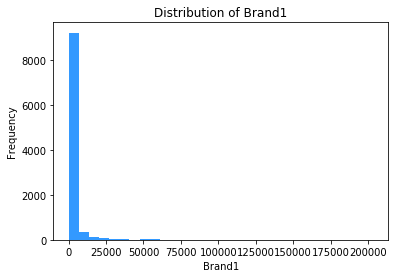

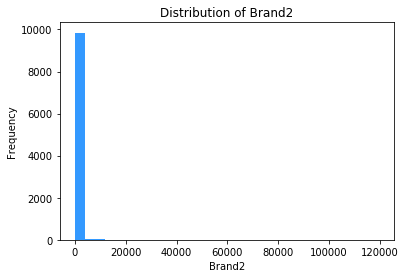

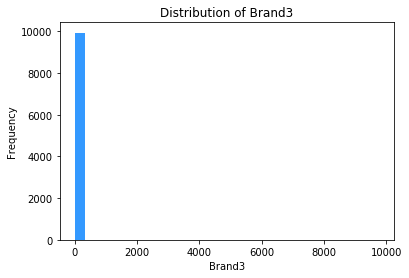

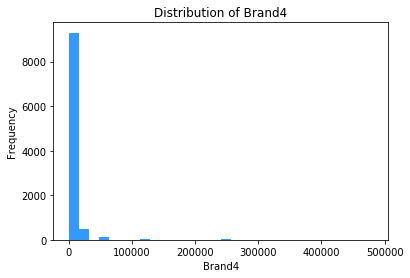

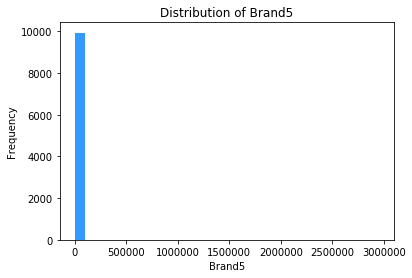

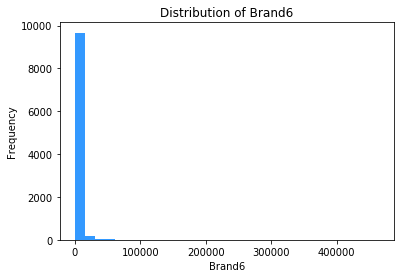

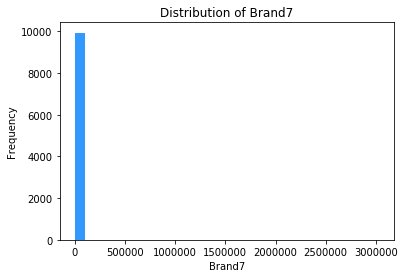

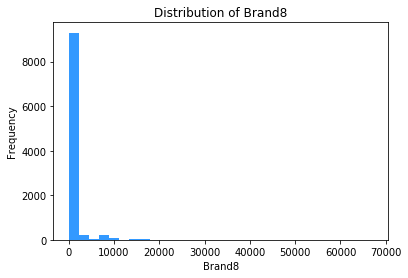

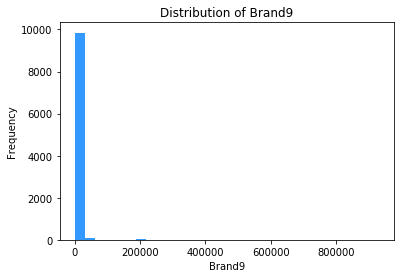

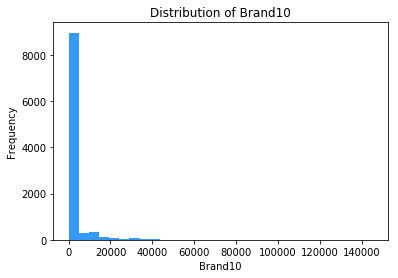

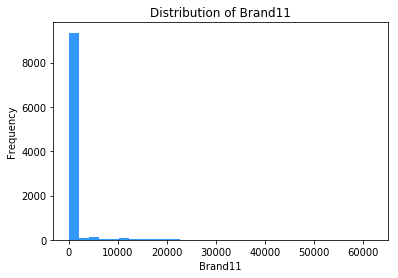

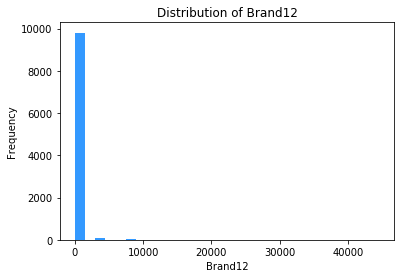

<Figure size 432x288 with 0 Axes>

In [7]:
# Checking the distribution of all the 12 Brands

col_name=['Brand1',
          'Brand2',
          'Brand3',
          'Brand4',
          'Brand5',
          'Brand6',
          'Brand7',
          'Brand8',
          'Brand9',
          'Brand10',
          'Brand11',
          'Brand12']

for i in col_name:
    plt.hist(data[i], bins= 30, color ='#3399ff')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + i)
    plt.show()
    plt.clf()

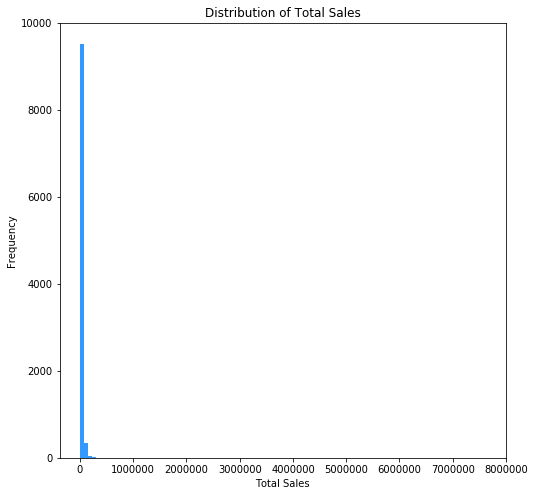

In [8]:
# Distibution of 'Total Sales'
plt.figure(figsize=(8,8))
plt.hist(data['Total Sales'],bins=100, color ='#3399ff')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')
plt.show()

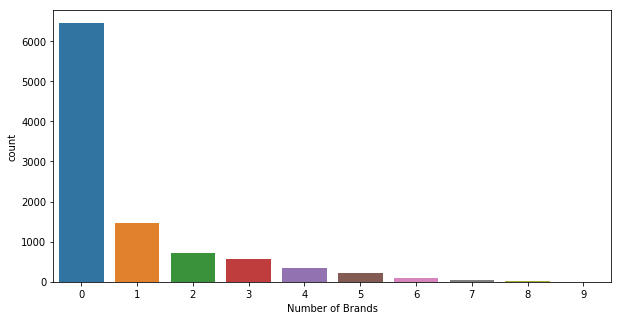

In [9]:
# Checking the distribution of 'Number of Brands'
plt.figure(figsize=(10,5))
sns.countplot(data['Number of Brands'])

In [ ]:
# By observing above distribution , we can see that frequency for '0' value of 'Number of Brands' is very very high.
# This means there are many retaliers which are not buying any Brand
# In other words out of 9938 retailers , more than 6000 retailers are not buying any brand.
# Hence they can be grouped in one cluster.

In [10]:
# Subsetting data into 2 groups of 'data_buyer' and 'data_non_buyer'
# Such that for 'data_buyer' the value of 'Numer of brands' > 0
# and for 'data_non_buyer' the value of 'Numer of brands' = 0

data_buyer = data[data['Number of Brands']!=0]
data_non_buyer = data[data['Number of Brands']==0]

In [11]:
# For all non-buyers, assigning the cluster as 'A'
data_non_buyer['Category of Retailer']= 'A'

D:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Creating a new dataframe 'brands' to better understand each brand 
brand = pd.DataFrame(index=col_name)
brand['Number of unique retailers'] = np.nan
brand['Total Sales'] = np.nan

In [13]:
# Filling the values for column 'Number of unique retailers' and 'Total Sales'
q=0
for i in col_name:
    brand['Number of unique retailers'][q] = data[i].nunique()-1
    brand['Total Sales'][q] = data[i].sum()
    q=q+1
    
brand['Total Sales'] = brand['Total Sales'].astype(int)

In [14]:
# Showing the dataframe 'brand'
brand

,Number of unique retailers,Total Sales
Brand1,153.0,16168606
Brand2,24.0,1569625
Brand3,1.0,9769
Brand4,15.0,26521117
Brand5,290.0,28745482
Brand6,203.0,12051657
Brand7,50.0,11774574
Brand8,27.0,6167040
Brand9,18.0,24706975
Brand10,259.0,16037918


In [38]:
# The above values of 'Number of unique retailers' shows the number of retailers buying that particular brand
# We can also see that only 1 retailer is buying Brand3 with total sale value of 9769
# Hence I will not consider Brand3 while making clusters
# For the retailer who is buying Brand3, I will reduce 'number of brands' by one

In [15]:
# Finding the index for which value of 'Brand3' is non-zero
data_buyer['Brand3'].nonzero()

(array([2546], dtype=int64),)

In [16]:
# For index# 2546, reducing the value of 'number of brands' by 1
data_buyer.iloc[2546,14] = data_buyer.iloc[2546,14]-1

D:\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
# Deleting the column of 'Brand3'
del data_buyer['Brand3']

In [18]:
# Now scaling the dataframe 'data_buyer'

# Creating a dataframe to contain only values
data_buyer_values = data_buyer.values[:,1:14]

cnames = ['Brand1',
         'Brand2',
         'Brand4',
         'Brand5',
         'Brand6',
         'Brand7',
         'Brand8',
         'Brand9',
         'Brand10',
         'Brand11',
         'Brand12',
         'Total Sales',
         'Number of Brands']

In [19]:
#Create Scaled Data Frame named 'data_scaled' from 'data_buyer_values'
scaler = MinMaxScaler()
data_scaled= scaler.fit_transform( data_buyer_values )
data_scaled = pd.DataFrame( data= data_scaled , columns= cnames)

D:\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
# Checking first 5 entries of data_scaled
data_scaled.head()

,Brand1,Brand2,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.212293,0.0,0.0,0.003934,0.00
1,0.048387,0.0,0.05,0.011438,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.008776,0.25
2,0.121499,0.0,0.00,0.009259,0.0,0.0,0.0,0.013889,0.000000,0.0,0.0,0.008421,0.25
3,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.027778,0.000000,0.0,0.0,0.003286,0.00
4,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.215621,0.0,0.0,0.003997,0.00


In [ ]:
########################### Cluster Analysis ###########################

In [21]:
#Checking number of clusters 
cluster_range = range (1,20)

cluster_error =[]

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit( data_scaled )
    cluster_error.append(clusters.inertia_)
    
cluster_df = pd.DataFrame( {'number of clusters' : cluster_range , 
                           'cluster error' : cluster_error})

Text(0,0.5,'Interia of Clusters')

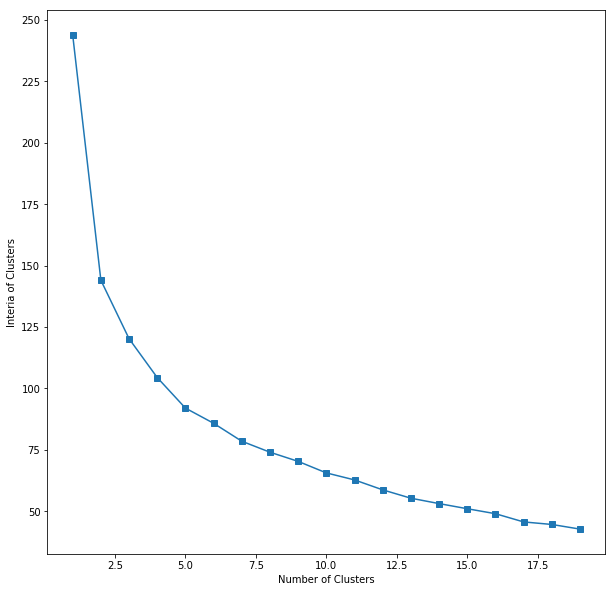

In [22]:
#Plotting Elbow Curve to determine optimum number of cluster 
plt.figure(figsize = (10,10))
plt.plot(cluster_df['number of clusters'] ,cluster_df['cluster error'] , marker ='s' )
plt.xlabel('Number of Clusters')
plt.ylabel('Interia of Clusters')

In [ ]:
# Number of clusters taken = 4 clusters

In [52]:
# Making 4 clusters using k-means on 'data_scaled'
k4model =KMeans(n_clusters=4).fit(data_scaled)

In [53]:
# Making a new column as '4 clusters' on 'data_scaled'
data_scaled['4 clusters'] = k4model.labels_

In [54]:
# Assigning the cluster number in 'data_buyer'
data_buyer['Category of Retailer'] = k4model.labels_

D:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
data_scaled.head()

,Brand1,Brand2,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,4 clusters
0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.212293,0.0,0.0,0.003934,0.00,0
1,0.048387,0.0,0.05,0.011438,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.008776,0.25,3
2,0.121499,0.0,0.00,0.009259,0.0,0.0,0.0,0.013889,0.000000,0.0,0.0,0.008421,0.25,3
3,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.027778,0.000000,0.0,0.0,0.003286,0.00,0
4,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.215621,0.0,0.0,0.003997,0.00,0


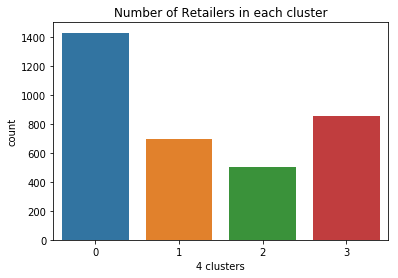

In [59]:
# Checking number of retailers in each cluster
sns.countplot(data_scaled['4 clusters'])
plt.title('Number of Retailers in each cluster')
plt.show()

In [60]:
# Performing t-SNE on 'data_scaled' to visualize the clusters
tsne = TSNE(n_components=2, 
            verbose=5, 
            perplexity=50,
            n_iter=3000)

tsne_results = tsne.fit_transform(data_scaled)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3489 samples in 0.016s...
[t-SNE] Computed neighbors for 3489 samples in 0.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3489
[t-SNE] Computed conditional probabilities for sample 2000 / 3489
[t-SNE] Computed conditional probabilities for sample 3000 / 3489
[t-SNE] Computed conditional probabilities for sample 3489 / 3489
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.641s
[t-SNE] Iteration 50: error = 65.6400757, gradient norm = 0.0440549 (50 iterations in 3.422s)
[t-SNE] Iteration 100: error = 57.2915688, gradient norm = 0.0152982 (50 iterations in 2.562s)
[t-SNE] Iteration 150: error = 55.2786407, gradient norm = 0.0106517 (50 iterations in 2.406s)
[t-SNE] Iteration 200: error = 54.3090210, gradient norm = 0.0111565 (50 iterations in 2.453s)
[t-SNE] Iteration 250: error = 53.7421570, gradient norm = 0.0057012 (50 iterations in 2.437s)
[t-SNE] KL divergence after 250 iterat

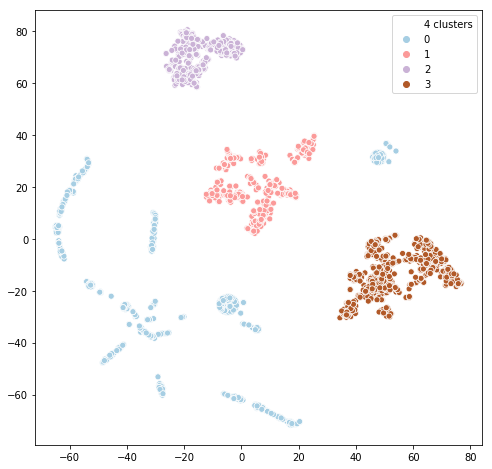

In [61]:
#Scatter plot after t-SNE-axis and Kmeans cluster to visualize the clusters
plt.figure( figsize = (8,8))
sns.scatterplot(tsne_results[:,0] , 
                tsne_results[:,1], 
                hue= '4 clusters' , 
                legend='full', 
                data=data_scaled , 
                palette= 'Paired' , 
                sizes= 200)

In [ ]:
# The k-means algorithm has given clusters names as 0, 1 , 2 and 3
# Reassigning the clusters to 'B' , 'C' , 'D' and 'E'

In [62]:
# Creating a dcitionary to replace values of clusters
cluster_rename = { 0: 'B' ,
                   1: 'C' ,
                   2: 'D' ,
                   3: 'E'}

# Replacing values of cluster in 'data_scaled'
data_scaled['4 clusters'] = data_scaled['4 clusters'].map(cluster_rename)

# Replacing values of cluster in 'data_buyer'
data_buyer['Category of Retailer'] = data_buyer['Category of Retailer'].map(cluster_rename)

D:\python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
# Grouping the data_buyer by clusters mean
data_buyer.groupby('Category of Retailer').mean().round(2)

,Brand1,Brand2,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
Category of Retailer,,,,,,,,,,,,,
B,1783.07,293.13,6171.22,6834.64,2343.95,341.35,456.11,2841.90,2618.26,208.42,27.17,24183.00,1.00
C,4434.05,323.70,8874.07,4827.78,3072.84,1902.15,2305.57,5985.92,4082.33,608.07,206.03,37084.58,1.98
D,9706.40,1070.48,9097.13,17006.02,6061.39,13463.64,3148.73,16290.57,8415.47,10181.23,913.60,96654.27,5.03
E,6576.00,448.82,8071.53,8199.59,4084.95,3697.14,2708.01,9636.22,6074.75,1817.33,397.00,52490.27,3.37


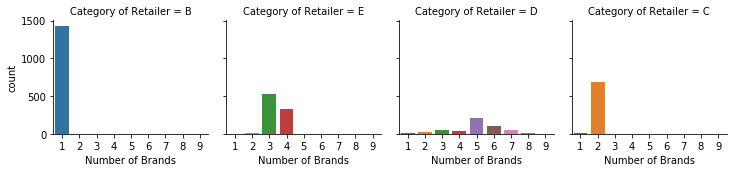

<Figure size 720x720 with 0 Axes>

In [64]:
# Plotting the 'number of brands' for each cluster
sns.catplot(x= 'Number of Brands',
            col='Category of Retailer', 
            col_wrap=5,
            data=data_buyer,
            kind="count", 
            height=2.5, 
            aspect=1)
plt.figure(figsize = (10,10))
plt.show()

In [ ]:
# By observing the above figures we can clearly see that :
# Cluster 'B' comprises of retailers that buys only 1 brand
# Cluster 'E' comprises of retailers that buys either 3 or 4 brands together
# Cluster 'D' comprises of retailers that buys only all brand but the number of such retailers is very less
# Cluster 'C' comprises of retailers that buys only 2 brand

In [65]:
# Now subsetting 'data_buyer' dataframe for further analysis of each cluster

cluster_B = data_buyer[data_buyer['Category of Retailer']=='B']

cluster_C = data_buyer[data_buyer['Category of Retailer']=='C']

cluster_D = data_buyer[data_buyer['Category of Retailer']=='D']

cluster_E = data_buyer[data_buyer['Category of Retailer']=='E']

In [66]:
# Creating an index for cluster analysis
col_names = ['Brand1',
             'Brand2',
             'Brand4',
             'Brand5',
             'Brand6',
             'Brand7',
             'Brand8',
             'Brand9',
             'Brand10',
             'Brand11',
             'Brand12']

In [ ]:
################################ 'Cluster B' Analysis ################################

In [67]:
# Creating a new dataframe 'cluster_B_details'
cluster_B_details = pd.DataFrame(index=col_names)

cluster_B_details['Number of unique customers'] = np.nan
cluster_B_details['Total Sales'] = np.nan
cluster_B_details['Mean of Total Sales'] = np.nan

In [68]:
# Filling the values of 'Number of unique customers' , 'Total Sales' and 'Mean of Total Sales'
q=0
for i in col_names:
    cluster_B_details['Number of unique customers'][q] = cluster_B[i].nunique()-1
    cluster_B_details['Total Sales'][q] = cluster_B[i].sum()
    cluster_B_details['Mean of Total Sales'][q] = (cluster_B_details['Total Sales'][q]) / ( cluster_B_details['Number of unique customers'][q])
    q=q+1

In [69]:
# Changing 'Total Sales' type to int and round off value of 'Mean of Total Sales' to 2 decimal places
cluster_B_details['Total Sales'] = cluster_B_details['Total Sales'].astype(int)
cluster_B_details['Mean of Total Sales'] = cluster_B_details['Mean of Total Sales'].round(2)

In [70]:
cluster_B_details

,Number of unique customers,Total Sales,Mean of Total Sales
Brand1,43.0,2551570,59338.85
Brand2,11.0,419474,38134.08
Brand4,11.0,8831010,802819.15
Brand5,149.0,9780367,65640.05
Brand6,79.0,3354194,42458.16
Brand7,13.0,488472,37574.83
Brand8,9.0,652696,72521.82
Brand9,8.0,4066753,508344.22
Brand10,81.0,3746723,46255.85
Brand11,10.0,298250,29825.06


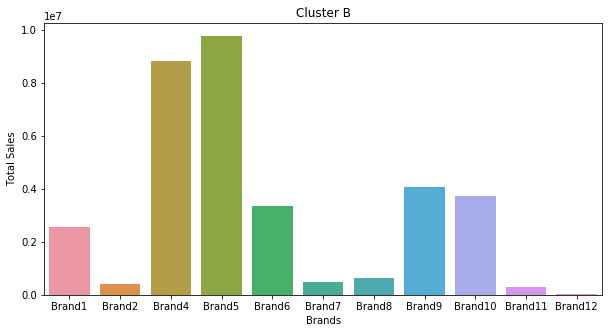

In [71]:
# Plotting the Total sales for each brand of Cluster 'B'
plt.figure(figsize = (10,5))
sns.barplot(   x=cluster_B_details.index,
               y='Total Sales',
               data= cluster_B_details)
plt.xlabel('Brands')
plt.title('Cluster B')
plt.show()

In [ ]:
################################ 'Cluster C' Analysis ################################

In [72]:
# Creating a new dataframe 'cluster_C_details'
cluster_C_details = pd.DataFrame(index=col_names)

cluster_C_details['Number of unique customers'] = np.nan
cluster_C_details['Total Sales'] = np.nan
cluster_C_details['Mean of Total Sales'] = np.nan

In [73]:
# Filling the values of 'Number of unique customers' , 'Total Sales' and 'Mean of Total Sales'
q=0
for i in col_names:
    cluster_C_details['Number of unique customers'][q] = cluster_C[i].nunique()-1
    cluster_C_details['Total Sales'][q] = cluster_C[i].sum()
    cluster_C_details['Mean of Total Sales'][q] = (cluster_C_details['Total Sales'][q]) / ( cluster_C_details['Number of unique customers'][q])
    q=q+1

In [74]:
# Changing 'Total Sales' type to int and round off value of 'Mean of Total Sales' to 2 decimal places
cluster_C_details['Total Sales'] = cluster_C_details['Total Sales'].astype(int)
cluster_C_details['Mean of Total Sales'] = cluster_C_details['Mean of Total Sales'].round(2)

In [75]:
cluster_C_details

,Number of unique customers,Total Sales,Mean of Total Sales
Brand1,57.0,3099400,54375.45
Brand2,7.0,226265,32323.69
Brand4,12.0,6202972,516914.38
Brand5,80.0,3374620,42182.75
Brand6,54.0,2147912,39776.15
Brand7,22.0,1329603,60436.50
Brand8,21.0,1611595,76742.66
Brand9,8.0,4184155,523019.41
Brand10,84.0,2853549,33970.83
Brand11,24.0,425038,17709.93


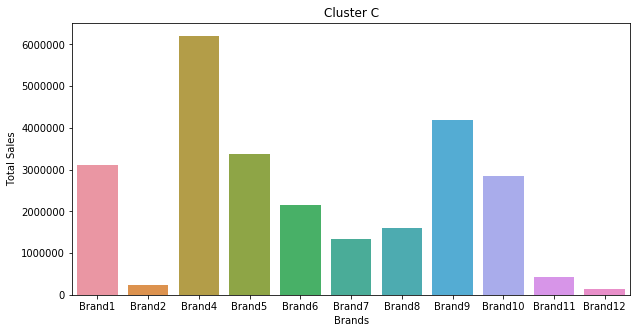

In [76]:
# Plotting the Total sales for each brand of Cluster 'C'
plt.figure(figsize = (10,5))
sns.barplot(   x=cluster_C_details.index,
               y='Total Sales',
               data= cluster_C_details)
plt.xlabel('Brands')
plt.title('Cluster C')
plt.show()

In [ ]:
################################ 'Cluster D' Analysis ################################

In [77]:
# Creating a new dataframe 'cluster_D_details'
cluster_D_details = pd.DataFrame(index=col_names)

cluster_D_details['Number of unique customers'] = np.nan
cluster_D_details['Total Sales'] = np.nan
cluster_D_details['Mean of Total Sales'] = np.nan

In [78]:
# Filling the values of 'Number of unique customers' , 'Total Sales' and 'Mean of Total Sales'
q=0
for i in col_names:
    cluster_D_details['Number of unique customers'][q] = cluster_D[i].nunique()-1
    cluster_D_details['Total Sales'][q] = cluster_D[i].sum()
    cluster_D_details['Mean of Total Sales'][q] = (cluster_D_details['Total Sales'][q]) / ( cluster_D_details['Number of unique customers'][q])
    q=q+1

In [79]:
# Changing 'Total Sales' type to int and round off value of 'Mean of Total Sales' to 2 decimal places
cluster_D_details['Total Sales'] = cluster_D_details['Total Sales'].astype(int)
cluster_D_details['Mean of Total Sales'] = cluster_D_details['Mean of Total Sales'].round(2)

In [80]:
cluster_D_details

,Number of unique customers,Total Sales,Mean of Total Sales
Brand1,91.0,4901732,53865.19
Brand2,14.0,540594,38613.92
Brand4,10.0,4594051,459405.14
Brand5,128.0,8588040,67094.07
Brand6,80.0,3060999,38262.50
Brand7,41.0,6799139,165832.68
Brand8,17.0,1590107,93535.76
Brand9,14.0,8226738,587624.16
Brand10,130.0,4249811,32690.86
Brand11,107.0,5141520,48051.60


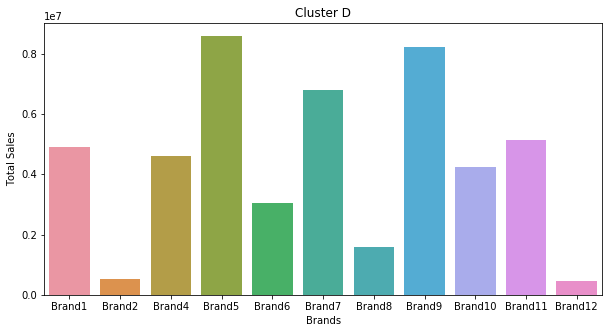

In [81]:
# Plotting the Total sales for each brand of Cluster 'C'
plt.figure(figsize = (10,5))
sns.barplot(   x=cluster_D_details.index,
               y='Total Sales',
               data= cluster_D_details)
plt.xlabel('Brands')
plt.title('Cluster D')
plt.show()

In [ ]:
################################ 'Cluster E' Analysis ################################

In [82]:
# Creating a new dataframe 'cluster_E_details'
cluster_E_details = pd.DataFrame(index=col_names)

cluster_E_details['Number of unique customers'] = np.nan
cluster_E_details['Total Sales'] = np.nan
cluster_E_details['Mean of Total Sales'] = np.nan

In [83]:
# Filling the values of 'Number of unique customers' , 'Total Sales' and 'Mean of Total Sales'
q=0
for i in col_names:
    cluster_E_details['Number of unique customers'][q] = cluster_E[i].nunique()-1
    cluster_E_details['Total Sales'][q] = cluster_E[i].sum()
    cluster_E_details['Mean of Total Sales'][q] = (cluster_E_details['Total Sales'][q]) / ( cluster_E_details['Number of unique customers'][q])
    q=q+1

In [84]:
# Changing 'Total Sales' type to int and round off value of 'Mean of Total Sales' to 2 decimal places
cluster_E_details['Total Sales'] = cluster_E_details['Total Sales'].astype(int)
cluster_E_details['Mean of Total Sales'] = cluster_E_details['Mean of Total Sales'].round(2)

In [85]:
cluster_E_details

,Number of unique customers,Total Sales,Mean of Total Sales
Brand1,83.0,5615902,67661.48
Brand2,11.0,383289,34844.50
Brand4,9.0,6893083,765898.14
Brand5,126.0,7002453,55575.03
Brand6,89.0,3488550,39197.20
Brand7,28.0,3157358,112762.81
Brand8,23.0,2312640,100549.57
Brand9,10.0,8229327,822932.79
Brand10,118.0,5187833,43964.69
Brand11,33.0,1552003,47030.41


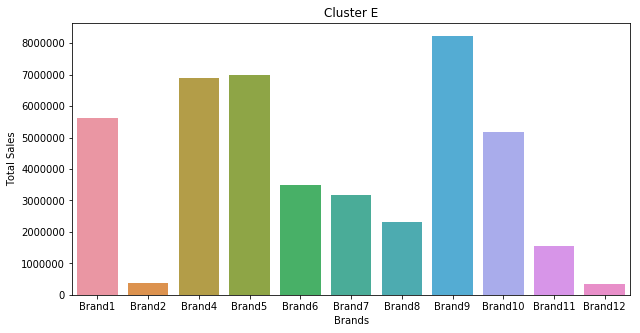

In [86]:
# Plotting the Total sales for each brand of Cluster 'E'
plt.figure(figsize = (10,5))
sns.barplot(   x=cluster_E_details.index,
               y='Total Sales',
               data= cluster_E_details)
plt.xlabel('Brands')
plt.title('Cluster E')
plt.show()

In [ ]:
# Combining the dataframes 'data_buyer' and 'data_non_buyer' into single dataframe named 'data_with_clusters'

In [87]:
# Deleting 'Brand3' column from data_non_buyer
del data_non_buyer['Brand3']

In [119]:
# Creating a new dataframe 'data_with_clusters'
data_with_clusters = pd.DataFrame(data_buyer)

# Appending 'data_buyer' and 'data_non_buyer'
data_with_clusters = data_with_clusters.append(data_non_buyer)

In [120]:
# Changing the type of 'Retailer Name' from object to str
data_with_clusters['Retailer Name'] = data_with_clusters['Retailer Name'].astype(str)

In [121]:
# In the 'Retailer name' column I will only store the numeric value of 'Retailer name'
for i in range(len(data_with_clusters)):
    retailer , data_with_clusters.iloc[i,0] = data_with_clusters.iloc[i,0].split('r')

In [122]:
# Changing the type of 'Retailer Name' from str to int
data_with_clusters['Retailer Name'] = data_with_clusters['Retailer Name'].astype(int)

In [123]:
# Sorting 'data_with_clusters' in ascending oreder based on 'Retailer Name'
data_with_clusters = data_with_clusters.sort_values('Retailer Name' , ascending = True)

In [124]:
# Changing the type of 'Retailer Name' from int to str
data_with_clusters['Retailer Name'] = data_with_clusters['Retailer Name'].astype(str)

In [125]:
# Adding 'Retailer' string to numeric part of 'Retailer Name'
name = 'Retailer '
data_with_clusters['Retailer Name'] = name + data_with_clusters['Retailer Name']

In [126]:
# Saving the 'data_with_clusters' to csv file
data_with_clusters.to_csv('Case Study Data with Retailer Category.csv' , sep=',', index=False)